# Project: Analyse @welovedogs tweets

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Datasets 
- An archive of @dog_rates tweets was provided by Udacity, it contains some information on the tweets eg tweet_id, text, name, ratings etc.
- A dataset containing the images included in the tweets, and thier image recognition result was also provided


> The following are questions to be explored using this dataset:
><li>Most popular and least popular dog name
><li>The Dog with the most retweets and likes
><li>Average overall rating 
><li>Average tweet engagement and at if its infleunced by time 
><li>Account growth rate
><li>Dog breeds with the highest rating

<a id='wrangling'></a>

## Data wrangling
<ul>
<li><a href="#gathering">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
</ul>

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import json
import tweepy
import re
import matplotlib.pyplot as plt
import seaborn as sns


<a id='gathering'></a>
### Gathering Data

In [72]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv',sep = '\t')

Getting Twitter API's access_token and access_secret <br>
The consumer_key and secret are hidden to comply with Twitter's API terms and conditions

In [4]:
consumer_key = 'sVYfTGyNUkedyDsCdhWc54et9'
consumer_secret = 'khGtdnpBZV0WklSWfbFOOWbROhIiMYDso0WVaX5Z79WuXdXuWX'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)

access_token = auth.access_token
access_secret = auth.access_token_secret

auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

Obtaining the `tweet_ids` to use with the twitter api

In [5]:
id = tweets.tweet_id.values

Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

In [337]:
fails = []
count = 1
with open('tweet-json.txt', 'w') as writefile:
    for x in id:
        print(str(count)+ ': ' + str(x))
        count += 1
        try:
            tweet = api.get_status(x, tweet_mode = 'extended')
            print('success')
            json.dump(tweet._json, writefile)
            writefile.write('\n')
        except tweepy.TweepError as error:
            print('fail')
            fails.append(str(x) + ': ' + str(error))
            pass
            

1: 892420643555336193


KeyboardInterrupt: 

Reading from the json text file created above 

In [73]:
tweet_info = pd.DataFrame()
i_d = []
favorite_count = []
retweet_count = []
followers = []
with open('tweet-json.txt', 'r') as json_data:
    for x in json_data:
        data = json.loads(x)
        i_d.append(data.get('id'))
        favorite_count.append(data.get('favorite_count'))
        retweet_count.append(data.get('retweet_count'))
        followers.append(data.get('user').get('followers_count'))

Writing the data into a dataframe called `tweet_info`

In [74]:
tweet_info['tweet_id'] = i_d
tweet_info['favorite_count'] = favorite_count
tweet_info['retweet_count'] = retweet_count
tweet_info['followers_count'] = followers

In [75]:
tweet_info

,tweet_id,favorite_count,retweet_count,followers_count
0,892420643555336193,34952,7334,8990741
1,892177421306343426,30266,5473,8990741
2,891815181378084864,22776,3620,8990741
3,891689557279858688,38227,7524,8990741
4,891327558926688256,36493,8095,8990741
...,...,...,...,...
2326,666049248165822465,93,38,8990852
2327,666044226329800704,259,122,8990852
2328,666033412701032449,106,39,8990852
2329,666029285002620928,117,41,8990852


<a id='assess'></a>

### Assessing Data


In [76]:
tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
21,887705289381826560,NaN,NaN,2017-07-19 16:06:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He has a monopoly on the pool...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887705289...,13,10,Jeffrey,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
153,862457590147678208,NaN,NaN,2017-05-11 00:01:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/862457590...,13,10,Jersey,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
2322,666430724426358785,NaN,NaN,2015-11-17 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh boy what a pup! Sunglasses take this one to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666430724...,6,10,None,None,None,None,None


In [77]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [78]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [79]:
tweets.groupby('name').count()['tweet_id']

name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: tweet_id, Length: 957, dtype: int64

In [80]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [81]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [82]:
tweet_info.describe()

,tweet_id,favorite_count,retweet_count,followers_count
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03
mean,7.419079e+17,7297.767482,2582.489918,8.990793e+06
std,6.823170e+16,11337.264701,4368.222352,5.050960e+01
min,6.660209e+17,0.000000,1.000000,8.990741e+06
25%,6.782670e+17,1262.000000,524.000000,8.990760e+06
50%,7.182469e+17,3161.000000,1205.000000,8.990789e+06
75%,7.986692e+17,8925.000000,2988.000000,8.990815e+06
max,8.924206e+17,150210.000000,74112.000000,8.991215e+06


In [83]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   favorite_count   2331 non-null   int64
 2   retweet_count    2331 non-null   int64
 3   followers_count  2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


#### Quality
##### `tweets` table
- Missing dog names in the `name` column
- Retweeted tweets and replies in table
- `Timestamp` column is an object not a datetime 
- Presence of other animals other than dogs 
- wrong `name` (officially, by, the, infuriating, a, quite, not, one, my, actually, all, his, an, mad)
- Some rating denominator values are'nt 10.
- Wrong rating values for `Bretagne`,`Bluebert`,`Darrel`,`Sam`and some others.
- Mistakes in the `rating_numerator` column.

##### `image_predictions` table
- No dogs predictions in some of the rows


##### `tweet_info` table
- Retweeted tweets and replies in table
- Missing data

#### Tidiness
- One variables in four columns in `tweets` table (pupper, puppo, doggo, and floofer) are all dog_types
- Only one column needed for dog_breed prediction
- `tweet_info` and `tweets` need to be one column 

<a id='cleaning'></a>

### Cleaning Data

Creating new dataframes where the cleaning operations will be performed

In [84]:
tweets_clean = tweets.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

#### Tidiness
`tweets` table
- One variables in four columns in `tweets` table (pupper, puppo, doggo, and floofer) are all dog_types<br>

**Define** <br>
Create a function to merge the four columns into 1 and delete them.

**Code**

In [85]:
def dog_type (a,b,c,d):
    if a == 'doggo':
        return (a)
    elif b == 'floofer':
        return (b)
    elif c == 'pupper':
        return (c)
    elif d == 'puppo':
        return (d)
    else:
        return(np.nan)

In [86]:
dog_types = map(dog_type,tweets_clean['doggo'],tweets_clean['floofer'],tweets_clean['pupper'],tweets_clean['puppo'])

In [87]:
tweets_clean['dog_types'] = list(dog_types)

In [88]:
tweets_clean = tweets_clean.drop(columns=['doggo','floofer','pupper','puppo'])

**Test**

In [89]:
tweets_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_types
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


#### Quality
`tweets` table
- Retweeted tweets and replies in table<br>

**Define** <br>
Remove the retweets and replies from the dataframe.

**Code**

In [90]:
tweets_clean = tweets_clean.query('in_reply_to_status_id != in_reply_to_status_id and retweeted_status_id != retweeted_status_id')

In [91]:
tweets_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace= True)

**Test**

In [92]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_types           336 non-null    object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


#### Quality
`tweets` table
- Timestamp column is an object not a datetime<br>

**Define** <br>
Change timestamp datatype to datetime using pandas `to_datetime` function.

**Code**

In [93]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean.timestamp)

**Test**

In [94]:
tweets_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN


#### Quality
`tweets` table
- Missing dog names in the name column
- Wrong name (officially, by, the, infuriating, a, quite, not, one, my, actually, all, his, an, mad)<br>

**Define** <br>
Create function to get all dog names after string `name is` and `named` in the text column.<br>
Prevent words such as `a`,`an`,`by`,`not`,`my` etc from being in the name column.<br>
All words('a','an','by','not','my','life','old','just','very', 'this','light','getting','unacceptable','space','None','officially','the','infuriating','such','quite', 'one', 'actually', 'all', 'his','incredibly','mad')


**Code**

In [95]:
def get (data):
    indexes =[]
    names =[]
    for index,df in data.iterrows():
        name = re.findall(r'(?<=\bThis is\s)([A-Z]\w+)| (?<=\bname is\s)([A-Z]\w+)|(?<=\bnamed\s)([A-Z]\w+)|(?<=\bMeet\s)([A-Z]\w+)|(?<=\bHere is\s)([A-Z]\w+)|(?<=\bhello to\s)([A-Z]\w+)|(?<=\bthis is\s)([A-Z]\w+)',df['text']) 
        for x in name:
            indexes.append(index)
            strin = re.findall(r'(\w+)', str(x))
            names.append(strin[0])
    return indexes,names

In [96]:
index, names = get(tweets_clean)
new_name = pd.DataFrame(index = index, data=names ,columns=['name'])
new_name

,name
0,Phineas
1,Tilly
2,Archie
3,Darla
4,Franklin
...,...
2315,Christoper
2317,Jimothy
2318,Kreggory
2319,Scout


In [97]:
tweets_clean.drop(columns=['name'],inplace=True)
tweets_clean = tweets_clean.merge(new_name,left_index=True,right_index=True,how = 'left')

In [98]:
tweets_clean.drop_duplicates(subset =['tweet_id'],inplace=True)

**Test**

In [99]:
tweets_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_types,name
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,Archie
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,Darla
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,Franklin
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN


#### Quality
`tweets` table
- Presence of other animals other than dogs<br>

**Define** 
Get all rows that do not contain dogs and drop them<br>


**Code**

In [100]:
non_dogs = (tweets_clean[(tweets_clean['text'].str.contains('We only rate dogs')) | 
                         (tweets_clean['text'].str.contains('Please only send dogs')) | 
                         (tweets_clean['text'].str.contains('please only send dogs')) | 
                         (tweets_clean['text'].str.contains('we only rate dogs')) | 
                         (tweets_clean['text'].str.contains('2 legs')) |
                         (tweets_clean['text'].str.contains('please only send in dogs')) |
                         (tweets_clean['text'].str.contains('Please only send in dogs'))])

In [101]:
tweets_clean.drop(non_dogs.index,inplace=True)

**Test**

In [102]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2034 non-null   int64              
 1   timestamp           2034 non-null   datetime64[ns, UTC]
 2   source              2034 non-null   object             
 3   text                2034 non-null   object             
 4   expanded_urls       2031 non-null   object             
 5   rating_numerator    2034 non-null   int64              
 6   rating_denominator  2034 non-null   int64              
 7   dog_types           336 non-null    object             
 8   name                1420 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 158.9+ KB


#### Quality
`tweets` table
- Some rating denominator values are'nt 10
- Wrong rating values for `Bretagne`,`Bluebert`,`Darrel`,`sam`and some others
- Mistakes in the `rating_numerator` column.<br>

**Define**<br>
Change the mistakes made in some of the column manually.<br>
Create a function to correct the other mistakes <br>


**Code**

In [103]:
tweets_clean[(tweets_clean['rating_denominator'] != 10) | (tweets_clean['rating_numerator'] >= 16)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_types,name
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,NaN,Sam
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,NaN,Logan
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,pupper,Sophie
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,NaN,Atticus
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,Bretagne
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,NaN
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,NaN,Bluebert


In [104]:
#Darrel is rated 10/10
tweets_clean.loc[1662,['rating_numerator','rating_denominator']] = 10,10

In [105]:
# Bluebert is rated 11/10
tweets_clean.loc[1202,['rating_numerator','rating_denominator']] = 11,10

In [106]:
#Bretagne is rated 14/10
tweets_clean.loc[1068,['rating_numerator','rating_denominator']] = 14,10 

In [107]:
# `666287406224695296` is rated 9/10
tweets_clean.loc[2335,['rating_numerator','rating_denominator']] = 9,10 

In [108]:
# Logan is rated 9.75/10 approximately 10/10
tweets_clean.loc[695,['rating_numerator','rating_denominator']] = 10,10 

In [109]:
# sophie is rated 11.27/10 approximately 11/10
tweets_clean.loc[763,['rating_numerator','rating_denominator']] = 11,10 

In [110]:
# `680494726643068929` is rated 11.26/10  approximately 11/10
tweets_clean.loc[1712,['rating_numerator','rating_denominator']] = 11,10 

In [111]:
# `722974582966214656` is rated 13/10
tweets_clean.loc[1165,['rating_numerator','rating_denominator']] = 13,10 

In [112]:
# sam has no rating drop sam 
tweets_clean.drop(516,inplace=True)

In [113]:
 tweets_clean[(tweets_clean['rating_denominator'] != 10)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_types,name
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,NaN
1228,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,NaN
1254,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,NaN,NaN
1274,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,NaN,NaN
1351,704054845121142784,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,NaN,NaN
1433,697463031882764288,2016-02-10 16:51:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,NaN,NaN
1635,684222868335505415,2016-01-05 04:00:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,NaN,NaN
1779,677716515794329600,2015-12-18 05:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144,120,NaN,NaN


In [114]:
def ratings_numerator (data):
    new_numer = []
    for index,df in data.iterrows():
        if df.rating_denominator > 10 :
            div = int(str(df.rating_denominator)[:-1])
            new= df.rating_numerator/div
            new_numer.append(new)
        else:
            new_numer.append(df.rating_numerator)
    return new_numer       

In [115]:
tweets_clean['rating_numerator'] = ratings_numerator(tweets_clean)

In [116]:
tweets_clean['rating_denominator'] = tweets_clean['rating_denominator'].apply(lambda x: x/int(str(x)[:-1]) if x >10 else x)

**Test**

In [117]:
tweets_clean[(tweets_clean['rating_denominator'] != 10) | (tweets_clean['rating_numerator'] >= 16)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_types,name
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,NaN,Atticus
2074,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,NaN,NaN


In [118]:
tweets_clean.reset_index(drop = True,inplace=True)

#### Quality
`tweet_info` table
- Retweeted tweets and replies in table
- Missing data<br>

#### Tidyness
`tweets` table

- `tweet_info` and `tweets` need to be one column
<br>

**Define**<br>
Merge both tables together on the `tweet_id` column <br>
Drop na values in `favorite_count` table<br>


**Code**

 

In [119]:
tweets_clean = tweets_clean.merge(tweet_info_clean,left_on='tweet_id',right_on='tweet_id',how= 'left')

In [135]:
tweets_clean.dropna(subset=['favorite_count'],inplace=True)

**Test**

In [136]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_types,name,favorite_count,retweet_count,followers_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,NaN,Phineas,34952.0,7334.0,8990741.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,NaN,Tilly,30266.0,5473.0,8990741.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,NaN,Archie,22776.0,3620.0,8990741.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,NaN,Darla,38227.0,7524.0,8990741.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,NaN,Franklin,36493.0,8095.0,8990741.0


#### Quality
`image_predictions` table
- No dogs predictions in some of the rows


#### Tidyness
`image_predictions` table
- Only one column needed for dog_breed prediction
<br>

**Define**<br>
Write a function to get the first correct dog prediction and use that prediction as the breed of the dog. <br>
Drop null values.<br>
Drop p1,p2,p3,their respective confidence and dog columns


**Code**

In [121]:
def breed (dataframe):
    breed = []
    for index,df in dataframe.iterrows():
        if df.p1_dog == True:
            breed.append(df.p1)
        elif df.p2_dog == True:
            breed.append(df.p2)
        elif df.p3_dog == True:
            breed.append(df.p3)
        else:
            breed.append(np.nan)
    return breed

In [122]:
image_predictions_clean['dog_breed'] = breed(image_predictions_clean)

In [123]:
image_predictions_clean.dropna(subset=['dog_breed'],inplace=True)

In [124]:
image_predictions_clean.drop(columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],inplace=True)

**Test**

In [125]:
image_predictions_clean

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua


<a id='eda'></a>

## Exploratory Data Analysis

### Research Question 1: Most popular and least popular dog names.

To answer this question i will be using the following dataframes:
> - tweets_clean

In [137]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_types,name,favorite_count,retweet_count,followers_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,NaN,Phineas,34952.0,7334.0,8990741.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,NaN,Tilly,30266.0,5473.0,8990741.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,NaN,Archie,22776.0,3620.0,8990741.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,NaN,Darla,38227.0,7524.0,8990741.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,NaN,Franklin,36493.0,8095.0,8990741.0


- Grouping the dataframe by the names of the dogs and counting the number of occurences of each name
- Sorting the values so that the most popular appears on top and the least popular at the bottom. 

In [138]:
dog_names = tweets_clean.groupby(['name']).count()['tweet_id']

In [139]:
dog_names= dog_names.sort_values(ascending =False)
dog_names

name
Charlie    10
Oliver     10
Lucy       10
Cooper     10
Tucker      9
           ..
Gustaf      1
Gustav      1
Gòrdón      1
Hall        1
Zuzu        1
Name: tweet_id, Length: 951, dtype: int64

Plotting a bar chart to show results

Text(0.5, 1.0, 'Top five dogs with the most frequency')

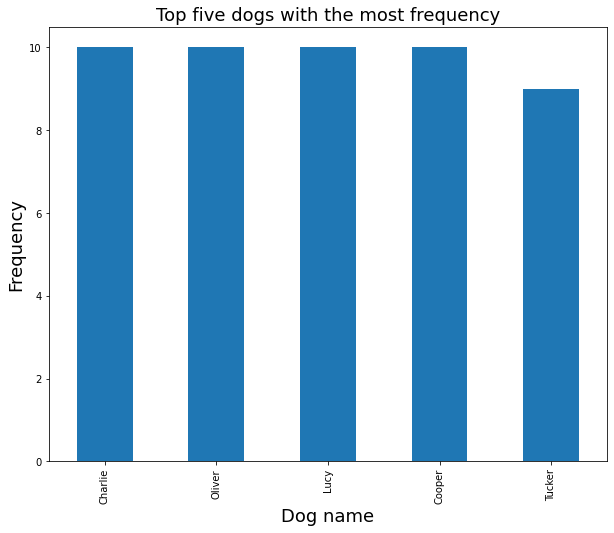

In [140]:
dog_names.iloc[:5].plot.bar(figsize = (10,8))
plt.xlabel('Dog name', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('Top five dogs with the most frequency', fontsize = 18)

In [141]:
dog_names[dog_names == 1]

name
Nollie     1
Lolo       1
Traviss    1
Noah       1
Trigger    1
          ..
Gustaf     1
Gustav     1
Gòrdón     1
Hall       1
Zuzu       1
Name: tweet_id, Length: 718, dtype: int64

### Research Question 2: The Dog with the most retweets and likes.

To answer this question i will be using the following dataframes:
> - tweets_clean

In [142]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_types,name,favorite_count,retweet_count,followers_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,NaN,Phineas,34952.0,7334.0,8990741.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,NaN,Tilly,30266.0,5473.0,8990741.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,NaN,Archie,22776.0,3620.0,8990741.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,NaN,Darla,38227.0,7524.0,8990741.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,NaN,Franklin,36493.0,8095.0,8990741.0


In [143]:
tweets_clean[tweets_clean['name'].isna()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_types,name,favorite_count,retweet_count,followers_count
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,18415.0,2713.0,8990741.0
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,58865.0,16445.0,8990741.0
12,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,puppo,NaN,43513.0,8716.0,8990741.0
21,887517139158093824,2017-07-19 03:39:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,10.0,NaN,NaN,42092.0,10255.0,8990741.0
23,887343217045368832,2017-07-18 16:08:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13.0,10.0,NaN,NaN,30541.0,9188.0,8990741.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2028,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN,93.0,38.0,8990852.0
2029,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,NaN,259.0,122.0,8990852.0
2030,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,NaN,106.0,39.0,8990852.0
2031,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN,117.0,41.0,8990852.0


In [145]:
tweets_clean.sort_values(by =['favorite_count'], ascending=False)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_types,name,favorite_count,retweet_count,followers_count
793,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,doggo,NaN,150210.0,74112.0,8990786.0
309,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,puppo,NaN,128529.0,41778.0,8990754.0
398,807106840509214720,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,NaN,Stephan,116027.0,54030.0,8990755.0
109,866450705531457537,2017-05-22 00:28:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,10.0,pupper,Jamesy,112575.0,31549.0,8990745.0
830,739238157791694849,2016-06-04 23:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10.0,doggo,NaN,111120.0,55230.0,8990787.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2005,666407126856765440,2015-11-17 00:06:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,https://twitter.com/dog_rates/status/666407126...,7.0,10.0,NaN,NaN,98.0,31.0,8990848.0
1997,666447344410484738,2015-11-17 02:46:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,https://twitter.com/dog_rates/status/666447344...,9.0,10.0,NaN,Scout,94.0,18.0,8990847.0
2015,666268910803644416,2015-11-16 14:57:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,https://twitter.com/dog_rates/status/666268910...,10.0,10.0,NaN,NaN,93.0,32.0,8990850.0
2028,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN,93.0,38.0,8990852.0
